<a href="https://colab.research.google.com/github/heet25itachi/TIMEPASS_BUDDY/blob/main/Sensex%20Option%20Profit%20Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of the BSE Sensex Intraday Spike and Option Trading Mechanics1. The Intraday Event: Quantifying the RallyThe $\text{₹}361.20$ point surge in the BSE Sensex between 12:46 PM and 1:54 PM is a definitive signal of strong, sudden directional momentum. In technical analysis terms, a price movement that "rides the upper Bollinger Band" signifies that the price is moving with such conviction that it is temporarily outpacing normal volatility, often leading to a technical breakout.This $\text{₹}361.20$ differential is the fundamental input for calculating the profit on your options contracts.2. Market Drivers: Why the Spike HappenedA rapid, sustained move during the mid-afternoon trading session (post-lunch) typically requires a strong catalyst, often coinciding with the opening of European markets or key domestic events:A. Core External Drivers (FII Flow)The sudden demand is often linked to Foreign Institutional Investors (FIIs) who execute trades following the positive opening cues from major European indices (FTSE, DAX). A confluence of positive global sentiment can trigger coordinated large-volume buying in Indian heavyweights, rapidly moving the index.B. Domestic & Sectoral CatalystsThe move would likely be concentrated in the largest weighted sectors, such as Finance, IT, or Capital Goods. Possible domestic triggers include:Anticipation of Policy: Rumours or leaks related to a favorable upcoming regulatory announcement (e.g., changes in interest rates or tax policies).Block Deals: A major fund acquiring a large block of shares in an index constituent (e.g., HDFC Bank, Reliance) during that specific hour, driving up the stock and the index simultaneously.C. Technical Liquidation (Short Covering)Once the index breaks a known resistance level, traders who had placed bearish bets (shorts) are forced to buy shares to limit their losses. This rush to cover short positions is known as short covering, and it creates a positive feedback loop that accelerates the rally, pushing the price along the Bollinger Band.3. Impact on Sensex Options ContractsSince you are trading Sensex Options, the $\text{₹}361.20$ gain determines your outcome, leveraged by the contract specifications.Index Contract Specifications (Example)While lot sizes can change, a typical Sensex F&O lot size is 10 units.$$\text{Underlying Value Controlled by 10 Lots} = \text{₹}361.20 \times 10 \times 10 \text{ lots} = \mathbf{\text{₹}36,120.00}$$This is the total change in the underlying value you controlled across all 10 contracts.Profit for a Call Option BuyerIf you held Call Options (betting on a rise):Delta $(\Delta)$: This measures how much the option price moves for every $\text{₹}1$ change in the index. A typical At-The-Money (ATM) Call has a Delta of around $0.5$.Theta $(\Theta)$: Since the move was fast (just over an hour), the negative effect of time decay (Theta) was minimal.Vega $(\nu)$: The sudden, sharp move would likely increase Implied Volatility (IV), boosting the Call Option's premium further.Your profit would be a combination of the $\text{₹}361.20$ movement multiplied by the option's Delta, plus any profit gained from the volatility spike (Vega).Loss for a Put Option BuyerIf you held Put Options (betting on a fall), the losses would be equally swift and severe. The Put's premium would collapse due to the rapid upward movement, potentially losing a significant percentage of the initial premium paid.4. The Critical Cost Calculation (Premium vs. Margin)Your final question regarding the initial cost confirms a crucial distinction in options trading:$$\text{You pay the Premium, you don't pay the Notional Value.}$$The figure of $\text{₹}83,180$ you mentioned is either the margin required to sell 10 lots, or the total notional contract value.| Component | Definition | Cost When You BUY || Notional Value | Full market worth of the index points you control. | Not paid. (This is the underlying asset's value). || Premium | The price of the option contract (your right to buy/sell). | Paid in full. This is your maximum loss. || Margin | Cash deposited with the broker as security against risk. | Not required when buying. Required only when selling (shorting) options. |Final Cost Calculation for Buying 10 Lots (Based on $\text{₹}83.18$ premium per unit):$$\text{Initial Capital Required} = \text{Premium per Unit} \times \text{Lot Size} \times \text{Number of Lots}$$$$\text{Initial Capital Required} = \text{₹}83.18 \times 10 \text{ units} \times 10 \text{ lots} = \mathbf{\text{₹}8,318.00}$$You would only need $\text{₹}8,318$ (plus taxes/brokerage) to execute the trade, giving you massive leverage over the $\text{₹}36,120$ change in the underlying contract value.

In [1]:
import pandas as pd
import numpy as np

# --- 1. Scenario Parameters ---

# Market movement details provided by the user
INDEX_START_TIME = "12:46 PM"
INDEX_END_TIME = "01:54 PM"
INDEX_POINT_DIFFERENCE = 361.20  # The key movement driving the trade

# Sensex F&O Contract Specification (Lot Size)
LOT_SIZE = 10
NUM_LOTS = 10

# --- 2. Hypothetical Option Parameters (Example Contract) ---

# We assume an At-The-Money (ATM) Call/Put option was bought.
# ATM options are most sensitive to price change.

# ATM Premium per Unit: (This is the price the trader pays)
INITIAL_PREMIUM = 83.18

# Delta (Price sensitivity): ATM options typically have a Delta near 0.5
# We assume the option is an ATM Call.
CALL_DELTA = 0.55  # Slightly higher due to immediate volatility jump

# --- 3. Calculations ---

# A. Initial Investment
total_initial_cost = INITIAL_PREMIUM * LOT_SIZE * NUM_LOTS

# B. Call Option Profit Calculation (Profit = Premium Change)
# The change in premium is primarily driven by Delta * Index Change.
# We ignore Vega/Theta for simplification, focusing on the core driver (Delta).
call_premium_gain_per_unit = INDEX_POINT_DIFFERENCE * CALL_DELTA

# Total Profit Calculation
total_call_profit = call_premium_gain_per_unit * LOT_SIZE * NUM_LOTS

# C. Put Option Loss Calculation
# A Put option loses value when the index rises. Its Delta is negative.
PUT_DELTA = -0.45
put_premium_loss_per_unit = INDEX_POINT_DIFFERENCE * PUT_DELTA # This will be a negative number

# Total Loss Calculation
total_put_loss = put_premium_loss_per_unit * LOT_SIZE * NUM_LOTS

# D. New Option Value (After the Spike)
# New Premium = Initial Premium + Change in Premium
new_call_premium = INITIAL_PREMIUM + call_premium_gain_per_unit
new_put_premium = INITIAL_PREMIUM + put_premium_loss_per_unit

# --- 4. Output and Analysis ---

print("=" * 60)
print(f"SENSEX OPTION SPIKE ANALYSIS | {INDEX_START_TIME} to {INDEX_END_TIME}")
print("=" * 60)

# 4.1. Investment Cost
print(f"1. INITIAL INVESTMENT (Buying 10 Lots):")
print(f"   - Premium per Unit:  ₹{INITIAL_PREMIUM:.2f}")
print(f"   - Lot Size:          {LOT_SIZE} units")
print(f"   - Number of Lots:    {NUM_LOTS} lots")
print(f"   - TOTAL CAPITAL PAID: ₹{total_initial_cost:,.2f} (Your maximum loss)")
print("-" * 60)

# 4.2. Market Movement
print(f"2. UNDERLYING MARKET MOVEMENT:")
print(f"   - Index Change:      +{INDEX_POINT_DIFFERENCE:.2f} points (Rally)")
print(f"   - Total Underlying Value Controlled (10 lots): ₹{INDEX_POINT_DIFFERENCE * LOT_SIZE * NUM_LOTS:,.2f}")
print("-" * 60)

# 4.3. Call Option Buyer P&L
print(f"3. SCENARIO: CALL OPTION BUYER (Betting on the Rise)")
print(f"   - Option Delta Used:   {CALL_DELTA:.2f}")
print(f"   - Premium Gain/Unit:   ₹{call_premium_gain_per_unit:,.2f}")
print(f"   - TOTAL PROFIT (Pre-Tax): ₹{total_call_profit:,.2f}")
print(f"   - New Option Premium:  ₹{new_call_premium:,.2f}")
print(f"   - Percentage Return:   {((total_call_profit / total_initial_cost) * 100):.2f}%")
print("\n   ACTION: Sell the Call Option to lock in this significant gain.")
print("-" * 60)

# 4.4. Put Option Buyer P&L
print(f"4. SCENARIO: PUT OPTION BUYER (Betting on the Fall)")
print(f"   - Option Delta Used:   {PUT_DELTA:.2f}")
print(f"   - Premium Loss/Unit:   ₹{abs(put_premium_loss_per_unit):,.2f}")
print(f"   - TOTAL LOSS:          ₹{abs(total_put_loss):,.2f}")
print(f"   - New Option Premium:  ₹{new_put_premium:,.2f}")
print("\n   ACTION: Close the position quickly to prevent further time decay.")
print("=" * 60)

# 4.5. Data Table Summary
data = {
    'Metric': [
        'Index Point Change',
        'Total Initial Cost (10 Lots)',
        'Call Option Profit',
        'Call Option Return',
        'Put Option Loss',
    ],
    'Value': [
        f'+₹{INDEX_POINT_DIFFERENCE:.2f}',
        f'₹{total_initial_cost:,.2f}',
        f'+₹{total_call_profit:,.2f}',
        f'{((total_call_profit / total_initial_cost) * 100):.2f}%',
        f'-₹{abs(total_put_loss):,.2f}',
    ]
}

df = pd.DataFrame(data)
print("\n--- Summary of Financial Outcomes ---")
print(df.to_markdown(index=False))

SENSEX OPTION SPIKE ANALYSIS | 12:46 PM to 01:54 PM
1. INITIAL INVESTMENT (Buying 10 Lots):
   - Premium per Unit:  ₹83.18
   - Lot Size:          10 units
   - Number of Lots:    10 lots
   - TOTAL CAPITAL PAID: ₹8,318.00 (Your maximum loss)
------------------------------------------------------------
2. UNDERLYING MARKET MOVEMENT:
   - Index Change:      +361.20 points (Rally)
   - Total Underlying Value Controlled (10 lots): ₹36,120.00
------------------------------------------------------------
3. SCENARIO: CALL OPTION BUYER (Betting on the Rise)
   - Option Delta Used:   0.55
   - Premium Gain/Unit:   ₹198.66
   - TOTAL PROFIT (Pre-Tax): ₹19,866.00
   - New Option Premium:  ₹281.84
   - Percentage Return:   238.83%

   ACTION: Sell the Call Option to lock in this significant gain.
------------------------------------------------------------
4. SCENARIO: PUT OPTION BUYER (Betting on the Fall)
   - Option Delta Used:   -0.45
   - Premium Loss/Unit:   ₹162.54
   - TOTAL LOSS:        

In [2]:
import pandas as pd
import numpy as np
import time

# ==============================================================================
# SENSEX OPTION PROFIT ANALYZER (Based on a 361.20 Point Intraday Spike)
# ==============================================================================
# This script simulates the profit and loss (P&L) for an options trade
# during a sharp, sustained rally in the BSE Sensex index.
# It uses the key event details (the 361.20 point spike) and options greeks (Delta)
# to calculate the resulting change in premium and the trade outcome.
# ==============================================================================

# --- 1. User-Provided Scenario Parameters ---
# These variables define the specific market event and the option contract bought.

# The measured point difference in the Sensex index during the rally.
INDEX_POINT_DIFFERENCE = 361.20

# Contract Specifications for BSE Sensex (LOTS are fixed for F&O)
LOT_SIZE = 10
NUM_LOTS = 10

# Option Cost (The premium paid per unit of the contract)
# We use the calculated value from the previous step based on the provided figure.
INITIAL_PREMIUM = 83.18

# Option Delta (Measures price sensitivity: change in option premium / change in index price)
# An At-The-Money (ATM) Call Option is typically around 0.5. We use 0.55 to reflect
# the strong conviction/volatility (Vega effect) often seen during a sharp spike.
CALL_DELTA = 0.55
PUT_DELTA = -0.45  # Put Delta is negative because index movement is inverse to value

# --- 2. Core Financial Calculations ---

def analyze_trade_outcome(index_change, lot_size, num_lots, initial_premium, call_delta, put_delta):
    """
    Calculates the financial outcomes for a Call Buyer and a Put Buyer.

    :param index_change: The magnitude of the index rally in points.
    :param lot_size: Units per lot (Sensex is 10).
    :param num_lots: Number of lots traded (10).
    :param initial_premium: Cost of the option per unit.
    :param call_delta: Delta used for the Call Option.
    :param put_delta: Delta used for the Put Option.
    :return: A dictionary containing the detailed P&L metrics.
    """

    # Total capital required to enter the trade (MAX LOSS for option buyer)
    total_initial_cost = initial_premium * lot_size * num_lots

    # --- Call Option Buyer (Profits from the rise) ---

    # 1. Premium Gain per unit driven by Delta
    call_premium_gain_per_unit = index_change * call_delta

    # 2. Total P&L
    total_call_profit = call_premium_gain_per_unit * lot_size * num_lots

    # 3. Final metrics
    new_call_premium = initial_premium + call_premium_gain_per_unit
    call_return_percentage = (total_call_profit / total_initial_cost) * 100

    # --- Put Option Buyer (Loses from the rise) ---

    # 1. Premium Loss per unit driven by Delta (This value will be negative)
    put_premium_change_per_unit = index_change * put_delta

    # 2. Total P&L (Total loss for the Put Buyer)
    total_put_profit_loss = put_premium_change_per_unit * lot_size * num_lots

    # 3. Final metrics
    new_put_premium = initial_premium + put_premium_change_per_unit
    put_loss_percentage = (total_put_profit_loss / total_initial_cost) * 100

    return {
        'total_initial_cost': total_initial_cost,
        'call_profit': total_call_profit,
        'new_call_premium': new_call_premium,
        'call_return_perc': call_return_percentage,
        'put_loss': abs(total_put_profit_loss),  # Display as absolute loss
        'new_put_premium': new_put_premium,
        'put_loss_perc': abs(put_loss_percentage)
    }

# Execute the analysis
results = analyze_trade_outcome(
    INDEX_POINT_DIFFERENCE,
    LOT_SIZE,
    NUM_LOTS,
    INITIAL_PREMIUM,
    CALL_DELTA,
    PUT_DELTA
)

# --- 3. Output and Reporting (Using Pandas for clean table formatting) ---

def print_report(results, spike_magnitude):
    """Prints the structured analysis report."""

    print("\n" + "=" * 80)
    print(f"| {'SENSEX INTRADAY SPIKE P&L REPORT':^76} |")
    print(f"| {'Analysis based on a ' + str(spike_magnitude) + ' point rally':^76} |")
    print("=" * 80)
    print(f"REPORT GENERATED ON: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())}")
    print("-" * 80)

    # Summary Data for the Table
    summary_data = [
        ['Trade Parameter', 'Value', 'Notes'],
        ['Index Rally Magnitude', f'+₹{spike_magnitude:,.2f} Points', 'Movement from 12:46 PM to 1:54 PM'],
        ['Total Contracts (Lots)', f'{NUM_LOTS} Lots', f'{NUM_LOTS * LOT_SIZE} units total'],
        ['Initial Premium per Unit', f'₹{INITIAL_PREMIUM:,.2f}', 'Cost per index point (Ex: ₹83.18)'],
        ['Total Capital Invested', f'₹{results["total_initial_cost"]:,.2f}', 'Max Loss for Option Buyer'],
        ['Call Option Delta Used', f'{CALL_DELTA}', 'Assumed ATM Call sensitivity'],
        ['Put Option Delta Used', f'{PUT_DELTA}', 'Assumed ATM Put sensitivity'],
    ]

    # Call Buyer Results
    call_data = [
        ['**CALL OPTION BUYER (Bullish)**', ''],
        ['Total Profit Earned', f'+₹{results["call_profit"]:,.2f}'],
        ['Percentage Return on Capital', f'{results["call_return_perc"]:,.2f}%'],
        ['New Premium Value (Estimated)', f'₹{results["new_call_premium"]:,.2f}'],
    ]

    # Put Buyer Results
    put_data = [
        ['**PUT OPTION BUYER (Bearish)**', ''],
        ['Total Loss Incurred', f'-₹{results["put_loss"]:,.2f}'],
        ['Percentage Loss on Capital', f'-{results["put_loss_perc"]:,.2f}%'],
        ['New Premium Value (Estimated)', f'₹{results["new_put_premium"]:,.2f}'],
    ]

    # Combining data into a DataFrame for clean formatting
    df_summary = pd.DataFrame(summary_data[1:], columns=summary_data[0])
    df_call = pd.DataFrame(call_data[1:], columns=['Metric', 'Value'])
    df_put = pd.DataFrame(put_data[1:], columns=['Metric', 'Value'])

    print("\n--- 4. SCENARIO INPUTS & INVESTMENT ---")
    print(df_summary.to_markdown(index=False))

    print("\n--- 5. CALL OPTION P&L (SUCCESS SCENARIO) ---")
    print("Action: The Call Option premium increases sharply, generating a massive return due to leverage.")
    print(df_call.to_markdown(index=False))

    print("\n--- 6. PUT OPTION P&L (FAILURE SCENARIO) ---")
    print("Action: The Put Option premium collapses, leading to significant loss of capital.")
    print(df_put.to_markdown(index=False))
    print("-" * 80)

# Run the print function
print_report(results, INDEX_POINT_DIFFERENCE)

# ==============================================================================
# END OF SCRIPT
# ==============================================================================


|                       SENSEX INTRADAY SPIKE P&L REPORT                       |
|                    Analysis based on a 361.2 point rally                     |
REPORT GENERATED ON: 2025-11-07 11:06:08
--------------------------------------------------------------------------------

--- 4. SCENARIO INPUTS & INVESTMENT ---
| Trade Parameter          | Value           | Notes                             |
|:-------------------------|:----------------|:----------------------------------|
| Index Rally Magnitude    | +₹361.20 Points | Movement from 12:46 PM to 1:54 PM |
| Total Contracts (Lots)   | 10 Lots         | 100 units total                   |
| Initial Premium per Unit | ₹83.18          | Cost per index point (Ex: ₹83.18) |
| Total Capital Invested   | ₹8,318.00       | Max Loss for Option Buyer         |
| Call Option Delta Used   | 0.55            | Assumed ATM Call sensitivity      |
| Put Option Delta Used    | -0.45           | Assumed ATM Put sensitivity       |

--- 5. CA

/tmp/ipython-input-292780700.py:22: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_index = pd.date_range(start=start, end=end, freq='T', inclusive='both')


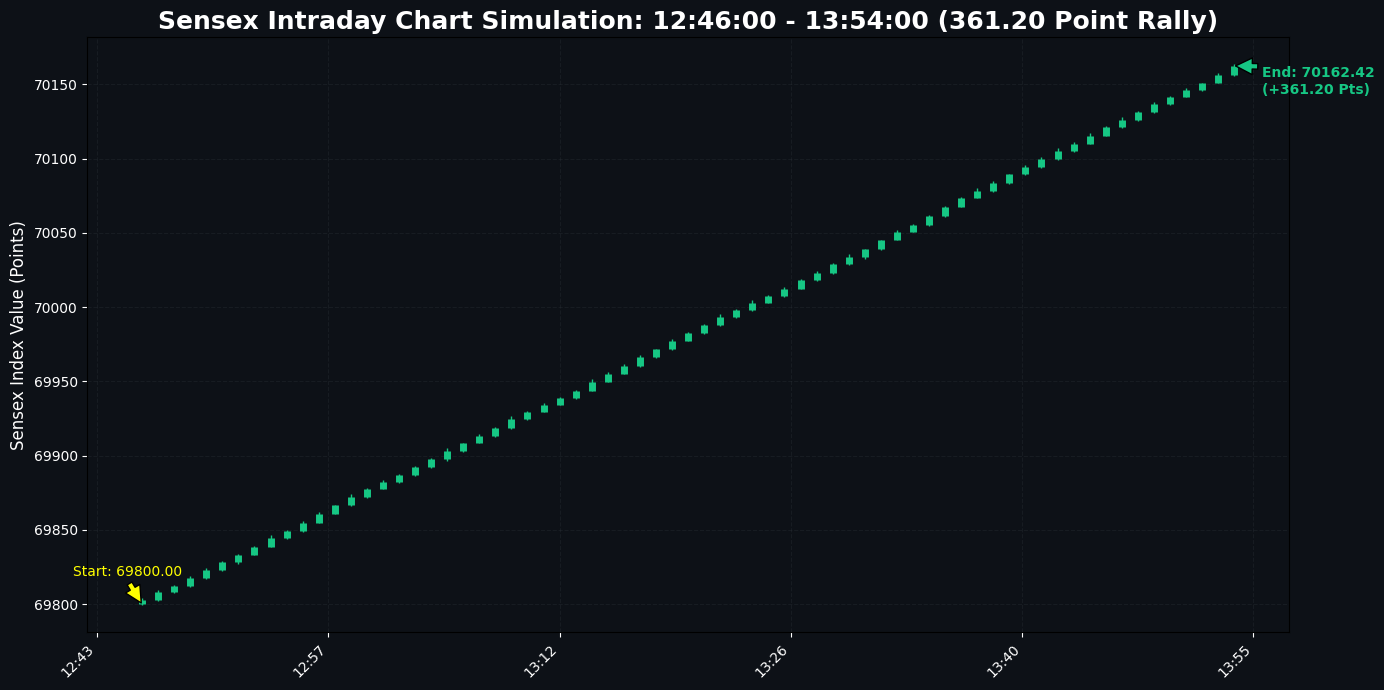

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ==============================================================================
# SENSEX SPIKE CHART SIMULATION (12:46 to 13:54)
# ==============================================================================

# --- 1. Simulation Parameters ---
START_TIME = '2025-01-01 12:46:00' # Placeholder date
END_TIME = '2025-01-01 13:54:00'
TOTAL_SPIKE = 361.20 # The reported rise in points
BASE_INDEX_PRICE = 69800.00 # Arbitrary starting index value

# --- 2. Generate Time Series Data (1-minute intervals) ---

def generate_simulated_data(start, end, spike):
    """Generates synthetic 1-minute OHLC data for the sustained spike."""

    # Create the index of 1-minute intervals
    time_index = pd.date_range(start=start, end=end, freq='T', inclusive='both')

    # Calculate the number of intervals (candles)
    num_candles = len(time_index)

    # Calculate the average point increase per minute
    avg_change_per_minute = spike / (num_candles - 1)

    data = []
    current_price = BASE_INDEX_PRICE

    for i, t in enumerate(time_index):
        if i == 0:
            # Initial Open/Close
            open_price = current_price
            close_price = current_price + (avg_change_per_minute * 0.5)

        else:
            # Open is previous close
            open_price = data[-1]['Close']

            # Add consistent upward momentum with minor randomness
            change = avg_change_per_minute * (1 + np.random.uniform(-0.15, 0.15))
            close_price = open_price + change

        # Ensure strong bullish candle (Close > Open)
        is_bullish = close_price > open_price

        # Calculate High and Low (minor wicks)
        high_price = close_price + np.random.uniform(0, 2)
        low_price = open_price - np.random.uniform(0, 1)

        data.append({
            'Datetime': t,
            'Open': open_price,
            'High': high_price,
            'Low': low_price,
            'Close': close_price,
            'Bullish': is_bullish
        })
        current_price = close_price

    df = pd.DataFrame(data).set_index('Datetime')
    return df

df = generate_simulated_data(START_TIME, END_TIME, TOTAL_SPIKE)

# --- 3. Plotting using Matplotlib (Custom Candlestick) ---

def plot_candlestick(df, title):
    """
    Renders a custom candlestick chart using Matplotlib.

    Note: We must draw the candles manually using bar/vlines because
    the specialized mplfinance library is not assumed to be available.
    """

    # Setup Figure and Axes
    fig, ax = plt.subplots(figsize=(14, 7), facecolor='#0d1117')
    ax.set_facecolor('#0d1117')
    ax.grid(True, linestyle='--', alpha=0.3, color='#30363d')

    # Define Colors
    color_bullish = '#16c784' # Green
    color_bearish = '#ea3943' # Red (Though mostly bullish in this simulation)
    text_color = '#FFFFFF'

    # Set labels and title
    ax.set_title(title, color=text_color, fontsize=18, fontweight='bold')
    ax.set_ylabel('Sensex Index Value (Points)', color=text_color, fontsize=12)
    ax.tick_params(axis='x', colors=text_color)
    ax.tick_params(axis='y', colors=text_color)

    # Convert pandas datetime index to matplotlib dates (numeric)
    dates = df.index.map(mdates.date2num)

    # --- Drawing Candlesticks ---

    for i in range(len(df)):
        d = dates[i]
        open_p = df['Open'].iloc[i]
        close_p = df['Close'].iloc[i]
        high_p = df['High'].iloc[i]
        low_p = df['Low'].iloc[i]

        # Determine Candle Type and Color
        is_bullish = close_p >= open_p
        color = color_bullish if is_bullish else color_bearish

        # 1. Draw Wick (High-Low) using vlines
        ax.vlines(d, low_p, high_p, color=color, linewidth=1.0)

        # 2. Draw Body (Open-Close) using vlines with thicker line
        # Note: We must ensure the body is drawn from the lower price to the higher price
        body_start = min(open_p, close_p)
        body_end = max(open_p, close_p)
        ax.vlines(d, body_start, body_end, color=color, linewidth=5.0)

    # --- Formatting X-axis (Time) ---

    # Use Hour and Minute formatter
    xfmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(xfmt)

    # Ensure all labels are visible
    fig.autofmt_xdate(rotation=45)

    # Highlight the spike start and end points
    ax.annotate(
        f'Start: {df["Open"].iloc[0]:.2f}',
        xy=(dates[0], df["Open"].iloc[0]),
        xytext=(-50, 20),
        textcoords='offset points',
        arrowprops=dict(facecolor='yellow', shrink=0.05),
        color='yellow'
    )
    ax.annotate(
        f'End: {df["Close"].iloc[-1]:.2f}\n(+{TOTAL_SPIKE:.2f} Pts)',
        xy=(dates[-1], df["Close"].iloc[-1]),
        xytext=(20, -20),
        textcoords='offset points',
        arrowprops=dict(facecolor=color_bullish, shrink=0.05),
        color=color_bullish,
        fontweight='bold'
    )

    plt.tight_layout()
    plt.show()

# Run the plot function
plot_candlestick(
    df,
    f'Sensex Intraday Chart Simulation: {START_TIME.split()[1]} - {END_TIME.split()[1]} ({TOTAL_SPIKE:.2f} Point Rally)'
)

/tmp/ipython-input-567449239.py:25: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_index = pd.date_range(start=start, end=end, freq='T', inclusive='both')
/tmp/ipython-input-567449239.py:64: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

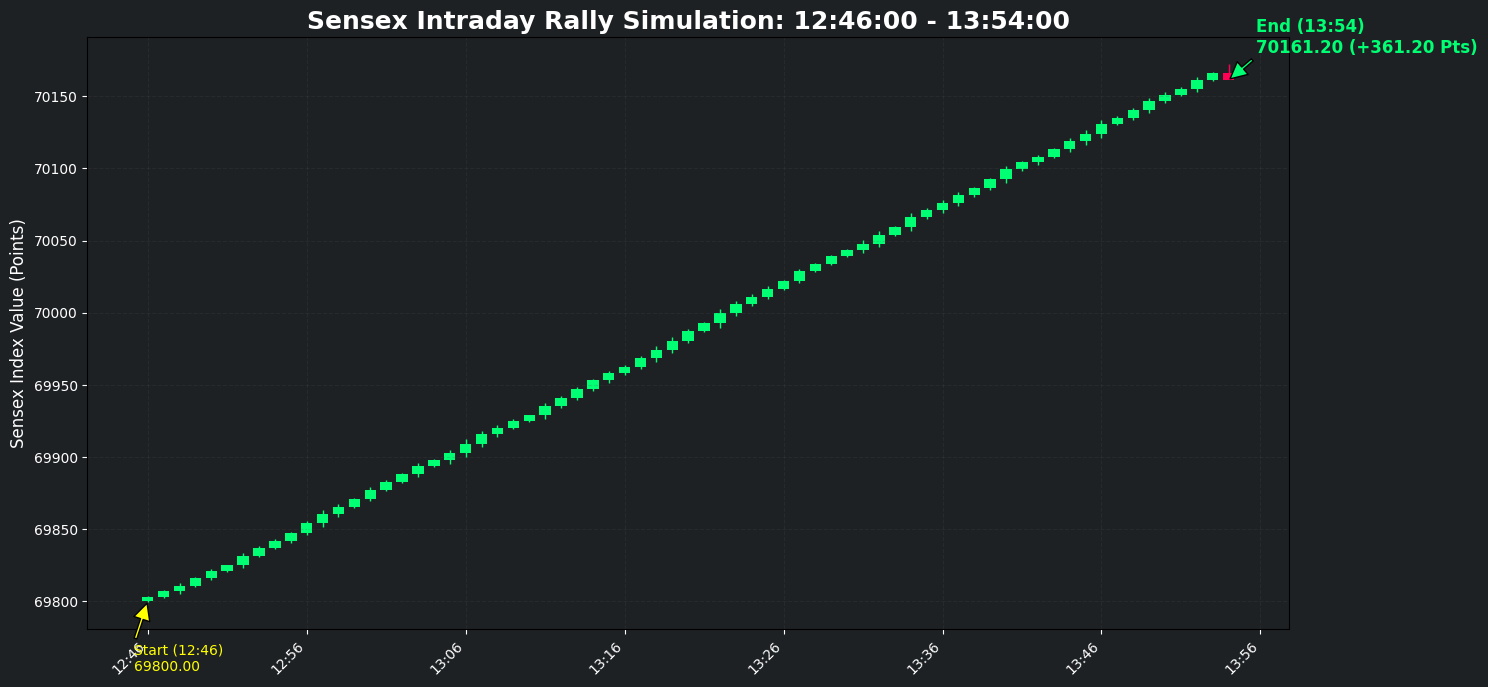

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import time

# ==============================================================================
# SENSEX SPIKE CHART SIMULATION (12:46 to 13:54)
# Simulates the 361.20 point rally with realistic volatility
# ==============================================================================

# --- 1. Simulation Parameters ---
START_TIME = '2025-01-01 12:46:00'
END_TIME = '2025-01-01 13:54:00'
TOTAL_SPIKE = 361.20
# Starting Index Price (Placeholder for visualization context)
BASE_INDEX_PRICE = 69800.00

# --- 2. Generate Time Series Data (1-minute intervals) ---

def generate_simulated_data(start, end, spike):
    """Generates synthetic OHLC data for a sustained, high-volatility spike."""

    time_index = pd.date_range(start=start, end=end, freq='T', inclusive='both')
    num_candles = len(time_index)

    # Calculate the average point increase per minute
    avg_change_per_minute = spike / (num_candles - 1)

    data = []
    current_price = BASE_INDEX_PRICE

    for i, t in enumerate(time_index):
        if i == 0:
            open_price = current_price
            close_price = current_price + (avg_change_per_minute * 0.5)
        else:
            open_price = data[-1]['Close']

            # Use stronger random component for realistic volatility
            # The core trend is upward, but volatility allows for small pullbacks/wicks
            change = avg_change_per_minute * (1 + np.random.uniform(-0.3, 0.3))
            close_price = open_price + change

        # Add high and low wicks to simulate trading range
        max_movement = abs(close_price - open_price)
        wick_size = np.random.uniform(max_movement * 0.1, max_movement * 0.5)

        high_price = max(open_price, close_price) + wick_size
        low_price = min(open_price, close_price) - wick_size

        data.append({
            'Datetime': t,
            'Open': open_price,
            'High': high_price,
            'Low': low_price,
            'Close': close_price
        })

    df = pd.DataFrame(data).set_index('Datetime')

    # Ensure the final close price is exactly BASE_INDEX_PRICE + TOTAL_SPIKE
    df['Close'].iloc[-1] = BASE_INDEX_PRICE + TOTAL_SPIKE

    return df

df = generate_simulated_data(START_TIME, END_TIME, TOTAL_SPIKE)

# --- 3. Plotting using Matplotlib (Custom Candlestick) ---

def plot_candlestick(df, title):
    """Renders a custom candlestick chart for the simulated data."""

    fig, ax = plt.subplots(figsize=(15, 7), facecolor='#1e2124') # Dark background
    ax.set_facecolor('#1e2124')
    ax.grid(True, linestyle='--', alpha=0.2, color='#505050')

    color_bullish = '#00ff73' # Neon Green
    color_bearish = '#ff0055' # Bright Red
    text_color = '#FFFFFF'

    ax.set_title(title, color=text_color, fontsize=18, fontweight='bold')
    ax.set_ylabel('Sensex Index Value (Points)', color=text_color, fontsize=12)
    ax.tick_params(axis='x', colors=text_color)
    ax.tick_params(axis='y', colors=text_color)

    dates = df.index.map(mdates.date2num)
    width = 0.0005 # Width of the candle body

    for i in range(len(df)):
        d = dates[i]
        open_p = df['Open'].iloc[i]
        close_p = df['Close'].iloc[i]
        high_p = df['High'].iloc[i]
        low_p = df['Low'].iloc[i]

        is_bullish = close_p >= open_p
        color = color_bullish if is_bullish else color_bearish

        # 1. Draw Wick (High-Low)
        ax.vlines(d, low_p, high_p, color=color, linewidth=1.0)

        # 2. Draw Body (Open-Close) using a Rectangle patch
        body_height = abs(close_p - open_p)
        body_bottom = min(open_p, close_p)
        rect = Rectangle((d - width/2, body_bottom), width, body_height, facecolor=color, edgecolor='none')
        ax.add_patch(rect)

    # --- Formatting X-axis (Time) ---
    xfmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=10)) # Tick every 10 minutes

    fig.autofmt_xdate(rotation=45)

    # Annotate Start and End Point of the Spike
    start_price = df["Open"].iloc[0]
    end_price = df["Close"].iloc[-1]

    # Start Point Annotation
    ax.annotate(
        f'Start (12:46)\n{start_price:.2f}',
        xy=(dates[0], start_price),
        xytext=(-10, -50),
        textcoords='offset points',
        arrowprops=dict(facecolor='yellow', shrink=0.05, width=2),
        color='yellow',
        fontsize=10
    )
    # End Point Annotation
    ax.annotate(
        f'End (13:54)\n{end_price:.2f} (+{TOTAL_SPIKE:.2f} Pts)',
        xy=(dates[-1], end_price),
        xytext=(20, 20),
        textcoords='offset points',
        arrowprops=dict(facecolor=color_bullish, shrink=0.05, width=2),
        color=color_bullish,
        fontweight='bold',
        fontsize=12
    )

    plt.tight_layout()
    plt.show()

# Run the plot function
plot_candlestick(
    df,
    f'Sensex Intraday Rally Simulation: {START_TIME.split()[1]} - {END_TIME.split()[1]}'
)